#  Machine Predictive Maintenance Classification Dataset

# import libraries

In [71]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [7]:
df=pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
df.shape

(10000, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [10]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# EDA exploratory Data Analysis

In [11]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [12]:
# drop column UDI and Product ID which impact on target column is null.
df.drop(['UDI','Product ID'],axis=1,inplace=True)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


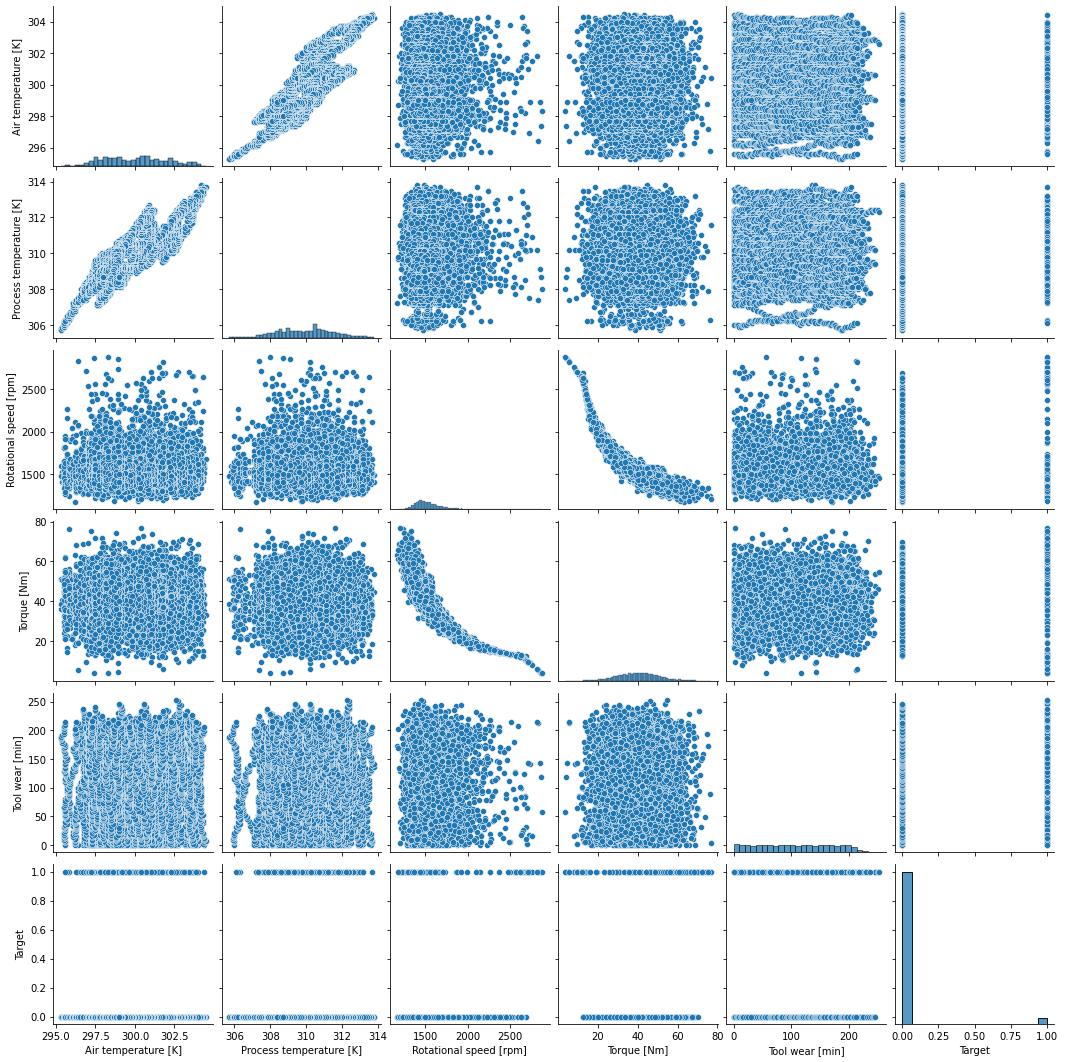

In [15]:
sns.pairplot(df)

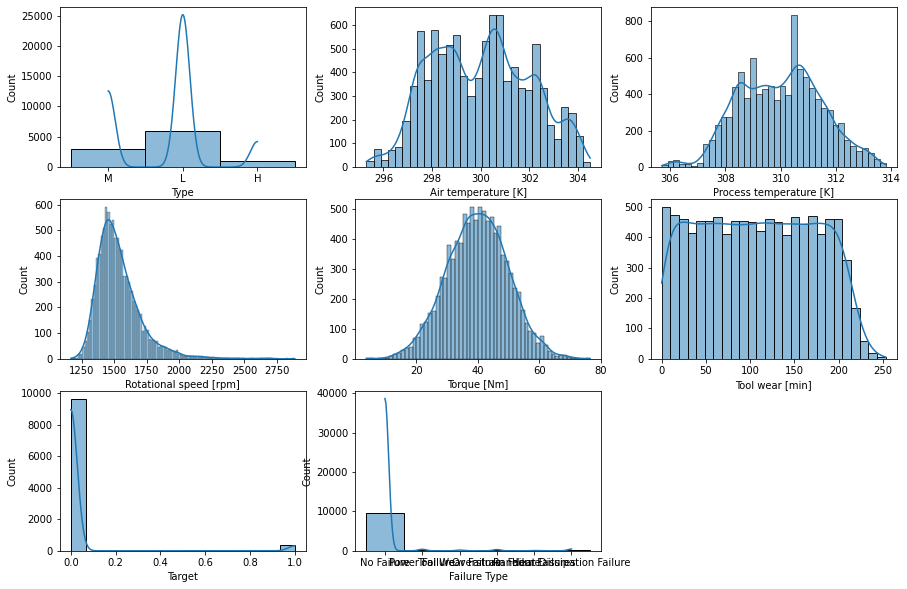

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

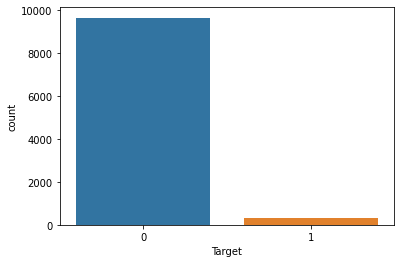

In [16]:
sns.countplot(df['Target'])

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

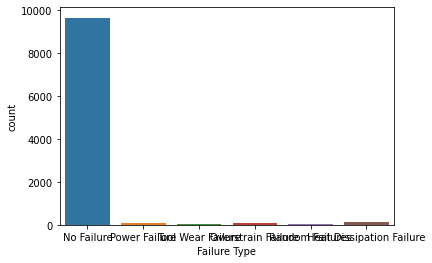

In [17]:
sns.countplot(df['Failure Type'])

In [18]:
from sklearn .preprocessing import LabelEncoder
encode=LabelEncoder()

In [19]:
df['Failure Type']=encode.fit_transform(df['Failure Type'])

In [20]:
encode.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [21]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1
2,L,298.1,308.5,1498,49.4,5,0,1
3,L,298.2,308.6,1433,39.5,7,0,1
4,L,298.2,308.7,1408,40.0,9,0,1


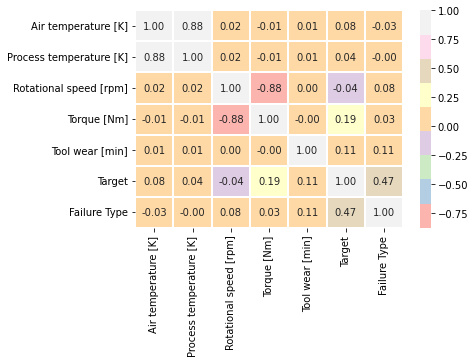

In [23]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Pastel1',fmt='.2f',linewidth=0.1,linecolor='white')
plt.show()

L    6000
M    2997
H    1003
Name: Type, dtype: int64


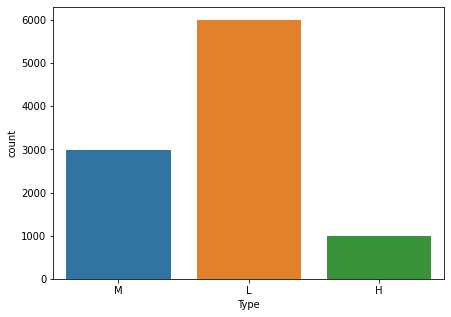

In [24]:
print(df['Type'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(df['Type'])
plt.show()

In [25]:
df_1=pd.get_dummies(df['Type'])
df_1

,H,L,M
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,1,0,0
9997,0,0,1
9998,1,0,0


In [26]:
df=pd.concat([df,df_1],axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,M,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,L,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,L,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,L,298.2,308.7,1408,40.0,9,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,1,0,0,1
9996,H,298.9,308.4,1632,31.8,17,0,1,1,0,0
9997,M,299.0,308.6,1645,33.4,22,0,1,0,0,1
9998,H,299.0,308.7,1408,48.5,25,0,1,1,0,0


In [27]:
df.drop('Type',axis=1,inplace=True)

In [28]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0,1,0


<AxesSubplot:>

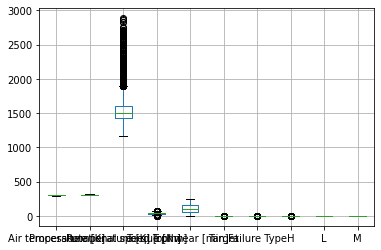

In [29]:
df.boxplot()

<AxesSubplot:xlabel='Rotational speed [rpm]'>

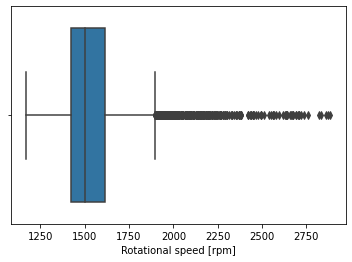

In [30]:
sns.boxplot(x=df['Rotational speed [rpm]'])

<AxesSubplot:xlabel='Torque [Nm]'>

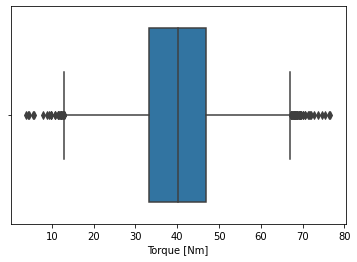

In [31]:
sns.boxplot(x=df['Torque [Nm]'])

<AxesSubplot:xlabel='Tool wear [min]'>

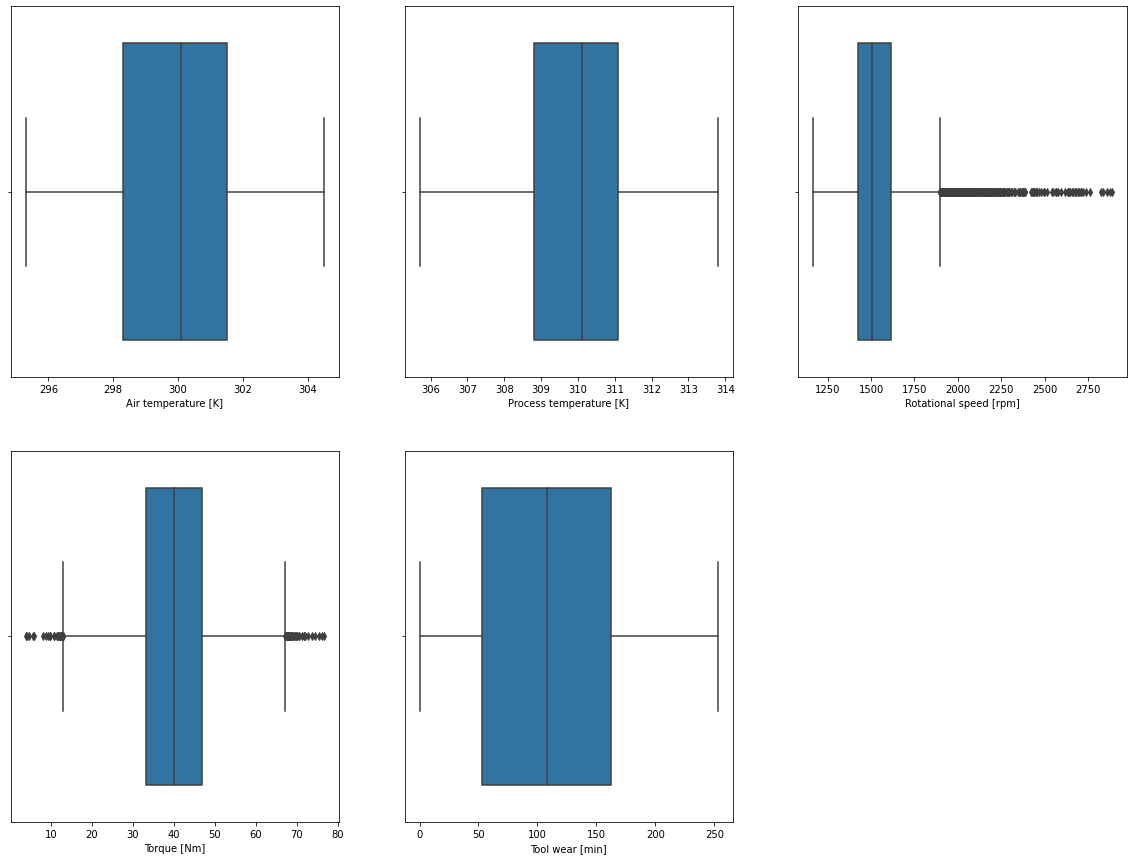

In [32]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'Air temperature [K]', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Process temperature [K]', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Rotational speed [rpm]', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Torque [Nm]', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Tool wear [min]', data = df)

In [33]:
col_out = df[['Rotational speed [rpm]','Torque [Nm]']]

for col in col_out.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    x = df[col].median()
    for i in range(0, len(df)):
        if df[col][i] > upper_tail:
            df.loc[i,col] = x

<AxesSubplot:xlabel='Tool wear [min]'>

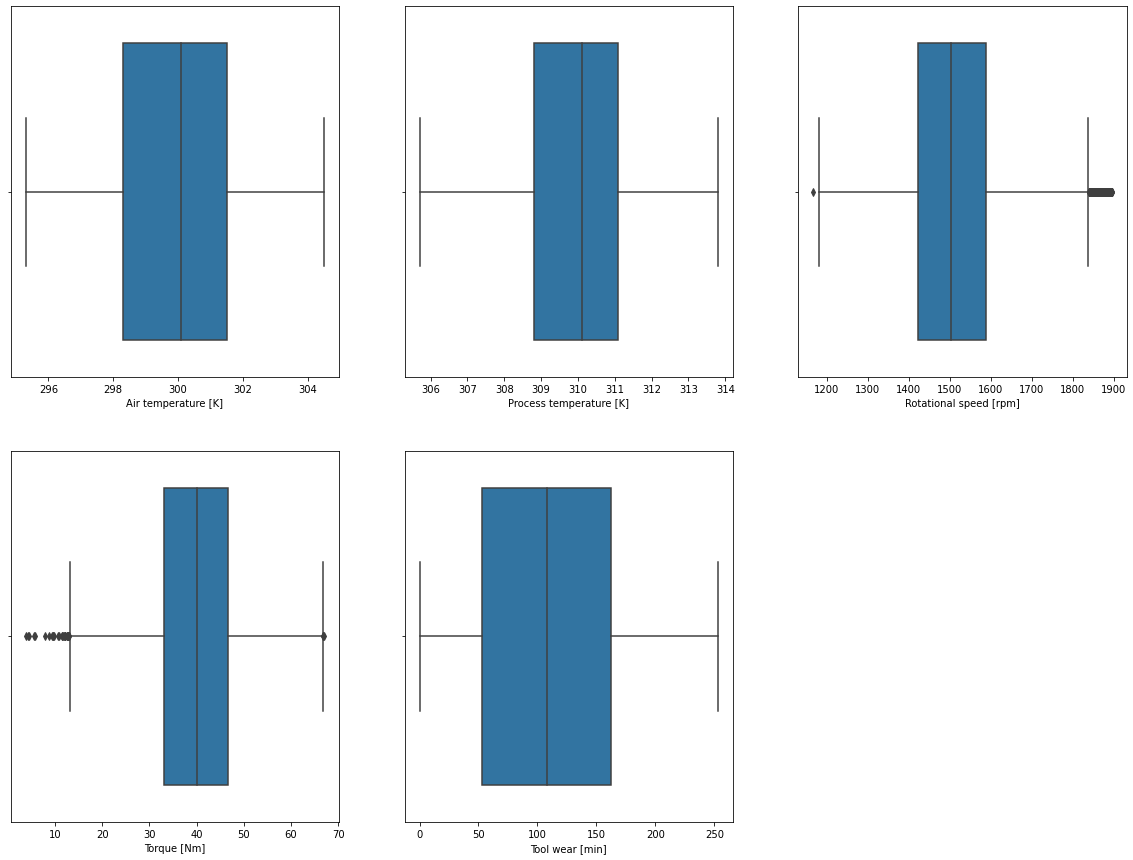

In [34]:
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'Air temperature [K]', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Process temperature [K]', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Rotational speed [rpm]', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Torque [Nm]', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Tool wear [min]', data = df)

In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

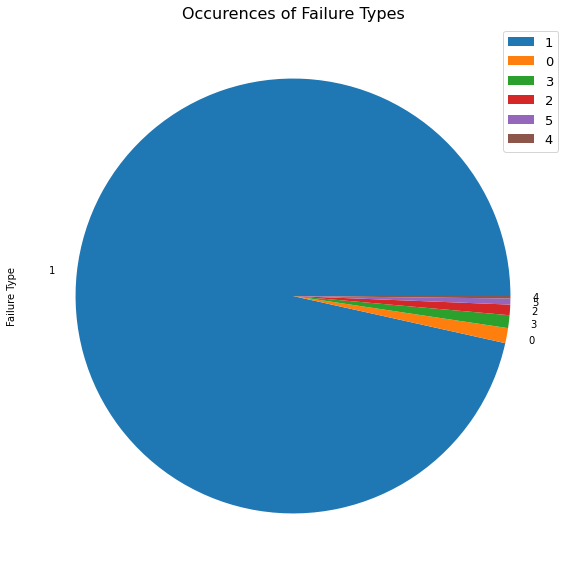

In [36]:
vc = df["Failure Type"].value_counts()

plt.title("Occurences of Failure Types", fontsize=16)

labels = ["No Failure", "Heat Dissipation Failure", "Power Failure", "Overstrain Failure", "Tool Wear Failure", 
          "Random Failures"]

vc.plot(kind="pie", figsize=(10,10), startangle=360)

plt.legend(fontsize=13)
plt.show()

In [37]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0,1,0


In [50]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,H,L,M
0,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,1,0,0,1
9996,298.9,308.4,1632,31.8,17,0,1,1,0,0
9997,299.0,308.6,1645,33.4,22,0,1,0,0,1
9998,299.0,308.7,1408,48.5,25,0,1,1,0,0


In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [59]:
x = df.drop(['Target','Failure Type'],axis=1)
y = df['Failure Type']
x.shape

(10000, 8)

In [60]:
x

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


# Normalization

In [61]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x)
normal_array = normal_scaler.transform(x)
df_normal = pd.DataFrame(normal_array,columns=x.columns)
df_normal

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,0.304348,0.358025,0.526823,0.617089,0.000000,0.0,0.0,1.0
1,0.315217,0.370370,0.330124,0.672468,0.011858,0.0,1.0,0.0
2,0.304348,0.345679,0.453920,0.721519,0.019763,0.0,1.0,0.0
3,0.315217,0.358025,0.364512,0.564873,0.027668,0.0,1.0,0.0
4,0.315217,0.370370,0.330124,0.572785,0.035573,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,0.380435,0.333333,0.599725,0.406646,0.055336,0.0,0.0,1.0
9996,0.391304,0.333333,0.638239,0.443038,0.067194,1.0,0.0,0.0
9997,0.402174,0.358025,0.656121,0.468354,0.086957,0.0,0.0,1.0
9998,0.402174,0.370370,0.330124,0.707278,0.098814,1.0,0.0,0.0


In [62]:
normal_scaler = MinMaxScaler()

normal_array = normal_scaler.fit_transform(x)

df_normal = pd.DataFrame(normal_array,columns=x.columns)
df_normal

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,0.304348,0.358025,0.526823,0.617089,0.000000,0.0,0.0,1.0
1,0.315217,0.370370,0.330124,0.672468,0.011858,0.0,1.0,0.0
2,0.304348,0.345679,0.453920,0.721519,0.019763,0.0,1.0,0.0
3,0.315217,0.358025,0.364512,0.564873,0.027668,0.0,1.0,0.0
4,0.315217,0.370370,0.330124,0.572785,0.035573,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
9995,0.380435,0.333333,0.599725,0.406646,0.055336,0.0,0.0,1.0
9996,0.391304,0.333333,0.638239,0.443038,0.067194,1.0,0.0,0.0
9997,0.402174,0.358025,0.656121,0.468354,0.086957,0.0,0.0,1.0
9998,0.402174,0.370370,0.330124,0.707278,0.098814,1.0,0.0,0.0


# Standardization

In [63]:
std_scaler = StandardScaler()
std_scaler.fit(x)
std_array = std_scaler.transform(x)
df_std = pd.DataFrame(std_array,columns=x.columns)
df_std

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M
0,-0.952389,-0.947360,0.291689,0.300049,-1.695984,-0.333889,-1.224745,1.528617
1,-0.902393,-0.879959,-0.827663,0.657863,-1.648852,-0.333889,0.816497,-0.654186
2,-0.952389,-1.014761,-0.123176,0.974785,-1.617430,-0.333889,0.816497,-0.654186
3,-0.902393,-0.947360,-0.631972,-0.037319,-1.586009,-0.333889,0.816497,-0.654186
4,-0.902393,-0.879959,-0.827663,0.013797,-1.554588,-0.333889,0.816497,-0.654186
...,...,...,...,...,...,...,...,...
9995,-0.602417,-1.082162,0.706554,-1.059646,-1.476034,-0.333889,-1.224745,1.528617
9996,-0.552421,-1.082162,0.925728,-0.824511,-1.428902,2.995011,-1.224745,-0.654186
9997,-0.502425,-0.947360,1.027487,-0.660939,-1.350349,-0.333889,-1.224745,1.528617
9998,-0.502425,-0.879959,-0.827663,0.882775,-1.303217,2.995011,-1.224745,-0.654186


# Train Test Split

In [64]:

# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=34, stratify=y)

x_train, x_test, y_train, y_test = train_test_split(df_normal,y, test_size=0.3 , random_state=34, stratify=y)

# x_train, x_test, y_train, y_test = train_test_split(df_std,y, test_size=0.3 , random_state=34, stratify=y)

# Model

In [75]:
knn_model = gscv_knn_model.best_estimator_ # ED
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
## Testing Data Evaluation
y_pred = knn_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[   5   29    0    0    0    0]
 [   2 2893    1    0    0    0]
 [   1   16    6    0    0    0]
 [   1   24    2    1    0    0]
 [   0    5    0    0    0    0]
 [   0   14    0    0    0    0]]
Accuracy is : 0.9683333333333334
Classification Report :
               precision    recall  f1-score   support

           0       0.56      0.15      0.23        34
           1       0.97      1.00      0.98      2896
           2       0.67      0.26      0.38        23
           3       1.00      0.04      0.07        28
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.53      0.24      0.28      3000
weighted avg       0.96      0.97      0.96      3000



In [77]:
## Training Data Evaluation
y_pred_train = knn_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[  33   44    1    0    0    0]
 [   5 6750    1    0    0    0]
 [   1   20   34    0    0    0]
 [   3   57    1    6    0    0]
 [   0   13    0    0    0    0]
 [   0   31    0    0    0    0]]
Accuracy is : 0.9747142857142858
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.42      0.55        78
           1       0.98      1.00      0.99      6756
           2       0.92      0.62      0.74        55
           3       1.00      0.09      0.16        67
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        31

    accuracy                           0.97      7000
   macro avg       0.61      0.35      0.41      7000
weighted avg       0.97      0.97      0.97      7000



In [72]:
knn_model = KNeighborsClassifier()

hyp = {'p' :[1,2],
      'n_neighbors' : np.arange(2,30)}

gscv_knn_model = GridSearchCV(knn_model, hyp, cv = 7)
gscv_knn_model.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2]})

In [73]:
gscv_knn_model.best_estimator_

KNeighborsClassifier()

In [74]:
gscv_knn_model.best_params_

{'n_neighbors': 5, 'p': 2}

# Logistic Regression

In [78]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [79]:
## Testing Data Evaluation
y_pred = lr_model.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_test, y_pred)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[   0   33    1    0    0    0]
 [   0 2896    0    0    0    0]
 [   0   21    2    0    0    0]
 [   0   28    0    0    0    0]
 [   0    5    0    0    0    0]
 [   0   14    0    0    0    0]]
Accuracy is : 0.966
Classification Report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.97      1.00      0.98      2896
           2       0.67      0.09      0.15        23
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        14

    accuracy                           0.97      3000
   macro avg       0.27      0.18      0.19      3000
weighted avg       0.94      0.97      0.95      3000



In [80]:
## Training Data Evaluation
y_pred_train = lr_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n", cnf_matrix)

acc_score = accuracy_score(y_train, y_pred_train)
print("Accuracy is :",acc_score)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[   1   76    1    0    0    0]
 [   0 6756    0    0    0    0]
 [   0   52    3    0    0    0]
 [   0   67    0    0    0    0]
 [   0   13    0    0    0    0]
 [   0   31    0    0    0    0]]
Accuracy is : 0.9657142857142857
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.01      0.03        78
           1       0.97      1.00      0.98      6756
           2       0.75      0.05      0.10        55
           3       0.00      0.00      0.00        67
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        31

    accuracy                           0.97      7000
   macro avg       0.45      0.18      0.18      7000
weighted avg       0.95      0.97      0.95      7000

